In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LogNorm

In [3]:
df = pd.read_csv("../cleaned/cleaned_restaurant_data.csv")
df.head()

,restaurant_name,city,locality,cuisines,average_cost_for_two,currency,has_table_booking,has_online_delivery,price_range,aggregate_rating,rating_text,votes,country
0,Le Petit Souffle,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,3,4.8,Excellent,314,Phillipines
1,Izakaya Kikufuji,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,3,4.5,Excellent,591,Phillipines
2,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,4,4.4,Very Good,270,Phillipines
3,Ooma,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),No,No,4,4.9,Excellent,365,Phillipines
4,Sambo Kojin,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),Yes,No,4,4.8,Excellent,229,Phillipines


## Do expensive restaurants always have higher ratings?

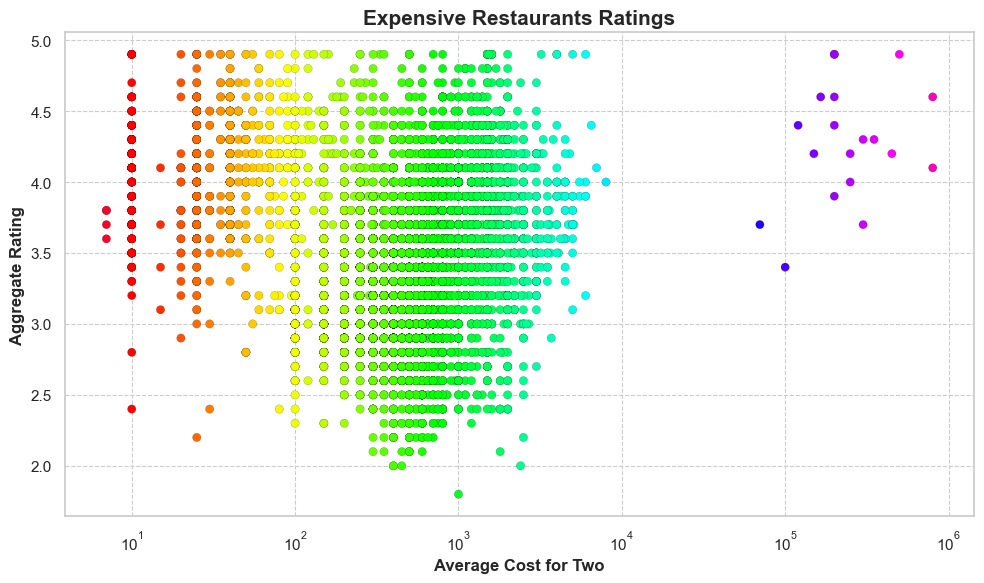

Correlation between cost and rating :  0.07557095130094303


In [109]:

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

sns.scatterplot(x="average_cost_for_two", y="aggregate_rating", data=df,hue="average_cost_for_two", palette="gist_rainbow", 
                sizes=(100, 40), legend=False, hue_norm=LogNorm(), edgecolor="black", linewidth=0.1)
plt.title("Expensive Restaurants Ratings", fontsize=15, fontweight="semibold") 
plt.ylabel("Aggregate Rating", fontsize=12, fontweight="semibold")
plt.xlabel("Average Cost for Two", fontsize=12, fontweight="semibold")
plt.xscale("log")
plt.grid(True, linestyle="--", linewidth=0.8)
plt.savefig("../visuals/expensive_restaurants_rating.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

correlation = df["average_cost_for_two"].corr(df["aggregate_rating"])
print("Correlation between cost and rating : ", correlation)

### Insight:
- The correlation between cost and ratings is very weak (correlation coefficient ≈ 0.075).
- Many low-cost restaurants (₹200–₹500 for two) have high ratings (4.0+), showing strong customer satisfaction at affordable prices.
- Some high-cost restaurants (₹1500+) only have average ratings (3.5–4.0).
- Conclusion: Higher pricing does not guarantee better ratings. Quality, not cost, is the key driver of customer satisfaction.


## What is the relationship between votes and ratings?

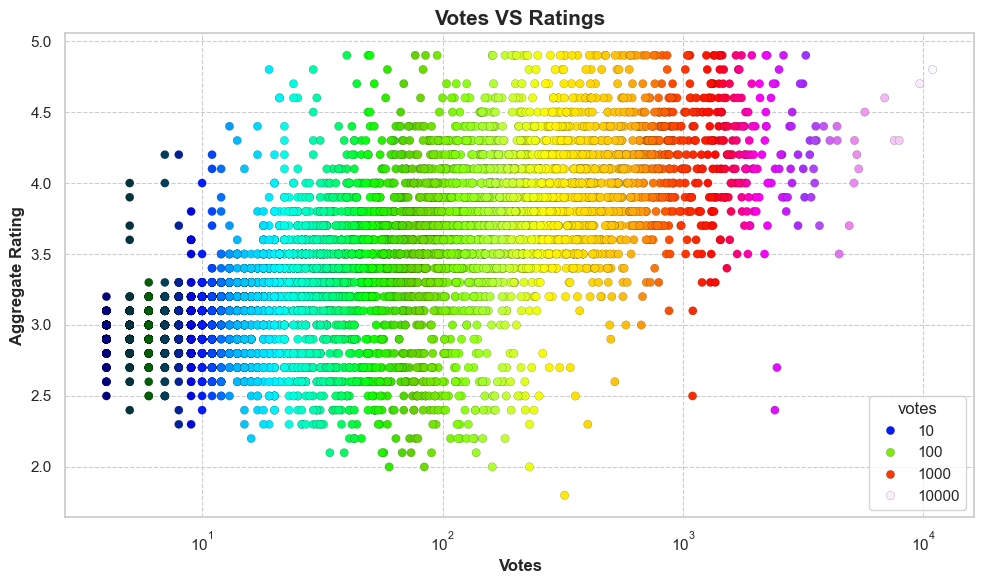

In [112]:

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

sns.scatterplot(x="votes", y="aggregate_rating", data=df, hue="votes", palette="gist_ncar", sizes=(10, 200),
                hue_norm=LogNorm(), edgecolor="black", linewidth=0.1)
plt.title("Votes VS Ratings", fontsize=15, fontweight="semibold") 
plt.ylabel("Aggregate Rating", fontsize=12, fontweight="semibold")
plt.xlabel("Votes", fontsize=12, fontweight="semibold")
plt.xscale("log")
plt.grid(True, linestyle="--", linewidth=0.8)
plt.tight_layout()
plt.savefig("../visuals/votes_VS_ratings.png", dpi=300, bbox_inches="tight")
plt.show()

### Insight: 
- There is a moderate positive correlation between votes and ratings.
- Highly-rated restaurants (rating > 4.0) usually receive more votes, indicating greater customer engagement and popularity.
- Low-rated restaurants (rating < 3.5) often have fewer votes, suggesting they may be less visited or less favored by customers.
- Conclusion: Restaurants that attract more customer feedback generally tend to perform better in terms of ratings, making votes a useful engagement quality indicator.

## Are there any outliers in cost or ratings that affect analysis?

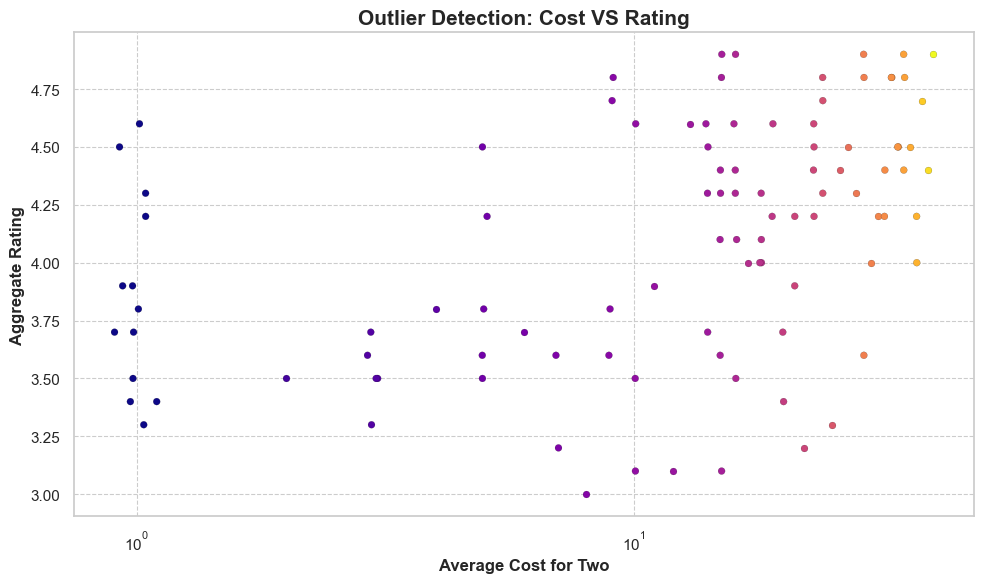

In [113]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

sns.stripplot(x="average_cost_for_two", y="aggregate_rating", data=df.head(100), jitter=True, hue="average_cost_for_two", 
              palette="plasma", legend=False,  hue_norm=LogNorm(), edgecolor="black", linewidth=0.1)
plt.title("Outlier Detection: Cost VS Rating", fontsize=15, fontweight="semibold") 
plt.ylabel("Aggregate Rating", fontsize=12, fontweight="semibold")
plt.xlabel("Average Cost for Two", fontsize=12, fontweight="semibold")
plt.xscale("log")
plt.grid(True, linestyle="--", linewidth=0.8)
plt.savefig("../visuals/outier_detection_cost_VS_rating.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

### Insight:
- Yes, multiple outliers exist in the dataset:
  - On the high end, some restaurants have extremely high average costs for two (₹10,000+), which is uncommon.
  - Despite their premium pricing, their ratings are often average (3.5–4.0), suggesting that high cost doesn't always reflect high quality.
  - On the low end, a few budget-friendly restaurants offer high ratings (4.0+), showing exceptional value-for-money service.
- These outliers can distort average-based analysis and should be carefully treated (e.g., flagged, removed from modeling, or analyzed separately).
- Conclusion: Outlier analysis is essential for accurate trend detection and data-driven decision-making.


## Summary of Key Insights
Through deeper analysis of cost, ratings, votes, and anomalies in the dataset, we uncovered valuable behavioral patterns:
- Higher pricing does not imply higher ratings. There is almost no correlation between cost and customer satisfaction. Many affordable restaurants deliver exceptional experiences and score high in ratings.

- A moderate positive relationship exists between votes and ratings. Highly-rated restaurants often receive more votes, indicating strong customer engagement and popularity.

- Several outliers in cost and rating were identified. Some expensive restaurants underperform in ratings, while some low-cost places offer top-rated experiences. These extremes can skew overall analysis and must be treated cautiously in visualization and modeling.

These insights emphasize the importance of quality, value-for-money, and customer trust over pricing alone — essential lessons for any food-tech business or startup aiming to gain customer loyalty and build a strong brand.
